# Proyek Analisis Data: Air Quality Aotizhongxin
- Nama: Ramadhani Samudra Gawang
- Email : - 
- ID Dicoding : -

## Menentukan Pertanyaan bisnis

- Bagaimana kualitas udara di Aotizhongxin dari tahun ke tahun? apakah ada perbaikan?
- Bagaimana trend udara di Aotizhongxin berdasarkan bulan?, dan dibulan apakah polusi udara di Aotizhongxin paling sedikit?
- Bagaimana trend udara di Aotizhongxin berdasarkan hari?, dan tanggal berapakah polusi udara di Aotizhongxin paling sedikit?
- Bagaimana trend udara di Aotizhongxin berdasarkan jam?, dan dijam berapakah polusi udara di Aotizhongxin paling sedikit?
- Apakah ada korelasi polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan seperti suhu, tekanan, titik embun, hujan, arah angin, dan kecepatan angin?a?

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
aotizhongxinDf = pd.read_csv("./data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxinDf.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
# create a datetime column using the year,month,day and hour columns.
years = aotizhongxinDf['year'].values
months = aotizhongxinDf['month'].values
days = aotizhongxinDf['day'].values
hours = aotizhongxinDf['hour'].values
full_date = []

for i in range(aotizhongxinDf.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
aotizhongxinDf = pd.concat([dates,aotizhongxinDf],axis=1)

aotizhongxinDf.head()

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [4]:
aotizhongxinDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     35064 non-null  datetime64[ns]
 1   No       35064 non-null  int64         
 2   year     35064 non-null  int64         
 3   month    35064 non-null  int64         
 4   day      35064 non-null  int64         
 5   hour     35064 non-null  int64         
 6   PM2.5    34139 non-null  float64       
 7   PM10     34346 non-null  float64       
 8   SO2      34129 non-null  float64       
 9   NO2      34041 non-null  float64       
 10  CO       33288 non-null  float64       
 11  O3       33345 non-null  float64       
 12  TEMP     35044 non-null  float64       
 13  PRES     35044 non-null  float64       
 14  DEWP     35044 non-null  float64       
 15  RAIN     35044 non-null  float64       
 16  wd       34983 non-null  object        
 17  WSPM     35050 non-null  float6

Check Null And Duplcate Data

In [5]:
aotizhongxinDf.isna().sum()

date          0
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [6]:
aotizhongxinDf.duplicated().sum()

0

In [7]:
aotizhongxinDf.describe(include="all")

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,34983,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,NaN,11.200000,NaN


### Cleaning Data

In [8]:
# Use mean data for null value
aotizhongxinDf['PM2.5'].fillna(value=82.7, inplace=True)
aotizhongxinDf['PM10'].fillna(value=110.0, inplace=True)
aotizhongxinDf['SO2'].fillna(value=17.3, inplace=True)
aotizhongxinDf['NO2'].fillna(value=59.3, inplace=True)
aotizhongxinDf['CO'].fillna(value=1262.9, inplace=True)
aotizhongxinDf['O3'].fillna(value=56.3, inplace=True)
aotizhongxinDf['TEMP'].fillna(value=13.5, inplace=True)
aotizhongxinDf['PRES'].fillna(value=1011.8, inplace=True)
aotizhongxinDf['DEWP'].fillna(value=3.1, inplace=True)
aotizhongxinDf['RAIN'].fillna(value=0.06, inplace=True)
aotizhongxinDf['WSPM'].fillna(value=1.7, inplace=True)
# Use top data for null value
aotizhongxinDf['wd'].fillna(value="NE", inplace=True)

### Exploratory Data Analysis ( EDA )

In [9]:
aotizhongxinDf.groupby("year").mean(numeric_only=True)

,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3672.5,7.500000,15.803922,11.5,82.392933,112.913126,23.491985,63.390192,1187.522277,50.217312,15.497740,1008.200408,6.465400,0.071582,1.532993
2014,11724.5,6.526027,15.720548,11.5,90.329338,121.386564,21.092511,63.741678,1194.542979,49.938174,13.878128,1011.318082,4.162203,0.056610,1.476895
2015,20484.5,6.526027,15.720548,11.5,82.132763,112.034692,14.406986,60.937272,1395.648231,63.746975,13.478408,1012.568415,2.736279,0.072685,1.895582
2016,29256.5,6.513661,15.756831,11.5,74.277539,94.841985,10.958242,48.725740,1196.488069,61.912762,13.863250,1012.823720,2.287614,0.079750,1.859255
2017,34356.5,1.474576,15.288136,11.5,94.625847,107.357345,20.790749,66.215890,1668.530085,47.572669,0.773682,1023.507333,-13.065254,0.003573,1.958828


In [10]:
aotizhongxinDf.groupby("month").mean(numeric_only=True)

,No,year,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,,,,,,,,,,,
1,20862.500000,2015.500000,16.000000,11.5,92.732056,113.882594,34.787769,65.989449,1946.693380,27.506183,-1.575711,1023.201193,-14.263239,0.000578,1.878091
2,21612.287611,2015.504425,14.628319,11.5,85.788532,104.197271,30.962463,53.742404,1438.641814,44.064012,1.304296,1021.378847,-12.684034,0.010863,1.974041
3,13518.500000,2014.500000,16.000000,11.5,99.697110,149.935013,31.559553,63.382511,1371.330376,47.824651,8.403951,1014.972116,-7.177352,0.009073,2.028125
4,14250.500000,2014.500000,15.500000,11.5,76.492292,130.474896,16.430481,53.038920,868.467153,65.061748,15.309271,1009.360347,1.170903,0.023542,2.173958
5,14982.500000,2014.500000,16.000000,11.5,67.453629,115.555141,16.067977,48.960786,802.228629,88.402826,21.419657,1003.427655,7.710517,0.047413,2.043548
6,15714.500000,2014.500000,15.500000,11.5,72.027951,87.055208,8.510176,49.536507,949.271007,94.120465,24.561424,1000.316250,16.130382,0.157326,1.543021
7,16446.500000,2014.500000,16.000000,11.5,75.369456,85.511089,5.942679,48.224800,841.317574,95.549735,27.195262,999.078730,20.390759,0.267238,1.470397
8,17190.500000,2014.500000,16.000000,11.5,56.257594,72.404267,4.578132,48.844312,817.598656,84.895792,26.715121,1002.197077,19.356250,0.116532,1.420296
9,17922.500000,2014.500000,15.500000,11.5,64.709479,87.373021,7.339502,59.397059,922.122743,52.037052,20.889666,1009.673681,14.366111,0.117472,1.349444


In [11]:
aotizhongxinDf.groupby("day").mean(numeric_only=True)

,No,year,month,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
day,,,,,,,,,,,,,,,
1,17198.500000,2014.666667,6.500000,11.5,90.469010,113.924740,15.053082,59.120239,1254.239062,53.385656,13.383681,1011.153646,3.217448,0.109896,1.713368
2,17222.500000,2014.666667,6.500000,11.5,75.058507,93.564410,18.127865,57.484115,1243.863108,53.398052,13.550744,1010.442361,2.817014,0.053125,1.656771
3,17246.500000,2014.666667,6.500000,11.5,86.845226,115.782118,19.123265,59.809620,1402.867014,57.452288,13.965538,1010.705208,2.509201,0.000694,1.796354
4,17270.500000,2014.666667,6.500000,11.5,93.991406,117.620660,17.101578,61.725653,1539.549045,58.758072,13.556134,1011.095052,3.080729,0.087674,1.713715
5,17294.500000,2014.666667,6.500000,11.5,78.999653,104.116319,15.994305,55.068186,1248.896441,62.026720,13.855903,1012.145775,2.993403,0.035503,1.814149
6,17318.500000,2014.666667,6.500000,11.5,89.470226,113.792535,19.220076,57.899057,1385.876649,58.051626,13.340842,1012.469401,2.793750,0.071181,1.603212
7,17342.500000,2014.666667,6.500000,11.5,88.382812,110.847222,18.992890,58.472519,1401.356944,55.368717,13.545602,1012.191638,3.369010,0.134028,1.663542
8,17366.500000,2014.666667,6.500000,11.5,85.181337,107.794271,18.973632,55.923156,1234.436632,58.578671,13.216109,1012.392535,2.206597,0.044444,1.870573
9,17390.500000,2014.666667,6.500000,11.5,73.969965,99.681424,16.145580,56.076719,1146.709201,55.714757,12.678819,1012.920631,2.028212,0.041667,1.793663


In [12]:
aotizhongxinDf.groupby("hour").mean(numeric_only=True)

,No,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,,,,,,,,,,,,,,,
0,17521.0,2014.66256,6.52293,15.729637,92.097673,124.349076,18.148928,71.550424,1433.195962,39.499723,11.373657,1012.252008,3.826489,0.075537,1.330732
1,17522.0,2014.66256,6.52293,15.729637,91.864066,123.401506,18.317314,70.408644,1458.984600,35.623857,10.906431,1012.176112,3.919165,0.045380,1.285695
2,17523.0,2014.66256,6.52293,15.729637,91.490281,120.105065,17.332790,66.808671,1436.844901,32.527159,10.445252,1012.115070,3.808966,0.055921,1.253525
3,17524.0,2014.66256,6.52293,15.729637,88.579603,114.427995,16.475133,65.016899,1349.516153,30.915296,10.059705,1012.064374,3.721697,0.122628,1.216701
4,17525.0,2014.66256,6.52293,15.729637,85.276591,109.070226,15.556123,64.175394,1311.212115,33.737107,9.741369,1012.058898,3.572827,0.073895,1.187817
5,17526.0,2014.66256,6.52293,15.729637,81.749692,103.494730,14.870754,61.923157,1292.131622,26.690826,9.479500,1012.212081,3.501232,0.052676,1.204791
6,17527.0,2014.66256,6.52293,15.729637,79.835729,100.583847,14.783466,61.374236,1294.501848,25.431412,9.628264,1012.438193,3.493361,0.043915,1.285558
7,17528.0,2014.66256,6.52293,15.729637,77.671732,98.929158,15.096887,61.428672,1315.357563,24.637837,10.560857,1012.818834,3.422724,0.029925,1.404107
8,17529.0,2014.66256,6.52293,15.729637,77.854278,101.429843,16.610782,61.592482,1334.578371,26.640385,11.978636,1013.083162,3.263723,0.042313,1.591718


In [13]:
aotizhongxinDf.corr(numeric_only = True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.024538,-0.080089,-0.246359,-0.087031,0.059743,0.051076,-0.107730,0.236794,-0.133160,0.002213,0.095764
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.030396,-0.072613,-0.181961,-0.114088,0.046248,0.073033,-0.137133,0.232448,-0.197177,-0.001038,0.133624
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.025005,-0.026812,-0.243882,0.116040,0.051236,-0.093257,0.130313,-0.005653,0.273096,0.013494,-0.161267
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.007794,0.031806,-0.018601,0.015456,-0.020082,0.003557,0.014318,0.022530,0.023420,-0.002493,-0.016706
hour,0.000684,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,-0.010268,0.022217,0.002852,-0.042846,-0.045935,0.290434,0.141115,-0.037600,-0.013425,0.011527,0.155478
PM2.5,-0.024538,-3.039630e-02,2.500475e-02,7.793787e-03,-1.026807e-02,1.000000,0.874105,0.476459,0.676871,0.755578,-0.158222,-0.127443,-0.005641,0.118154,-0.013966,-0.274126
PM10,-0.080089,-7.261283e-02,-2.681164e-02,3.180625e-02,2.221673e-02,0.874105,1.000000,0.464530,0.646959,0.657512,-0.137673,-0.109723,-0.035146,0.060874,-0.027769,-0.180911
SO2,-0.246359,-1.819606e-01,-2.438825e-01,-1.860055e-02,2.852446e-03,0.476459,0.464530,1.000000,0.429744,0.530064,-0.196627,-0.345045,0.200825,-0.277981,-0.041593,-0.111624
NO2,-0.087031,-1.140877e-01,1.160396e-01,1.545619e-02,-4.284600e-02,0.676871,0.646959,0.429744,1.000000,0.675436,-0.491926,-0.237125,0.080221,0.066238,-0.040020,-0.484607
CO,0.059743,4.624776e-02,5.123584e-02,-2.008170e-02,-4.593531e-02,0.755578,0.657512,0.530064,0.675436,1.000000,-0.317624,-0.355827,0.208129,-0.095091,-0.016659,-0.277854


### Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana kualitas udara di Aotizhongxin dari tahun ke tahun? apakah ada perbaikan?

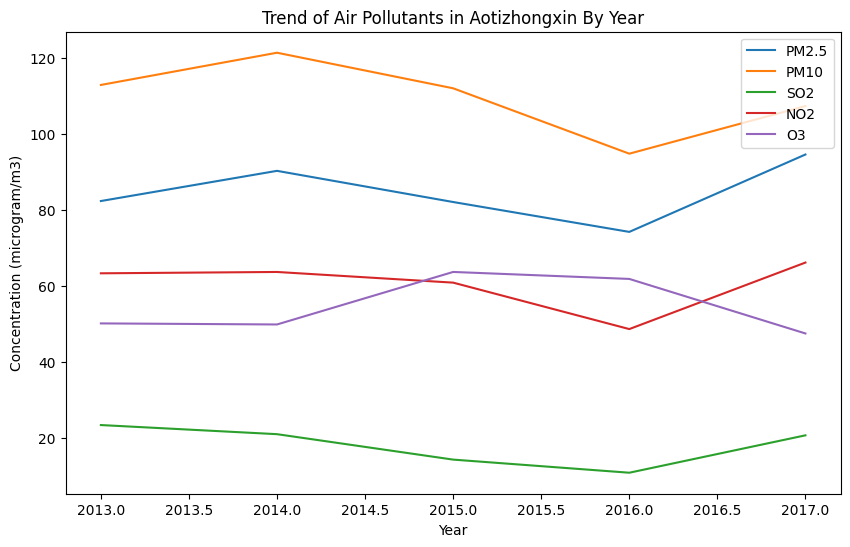

In [14]:
groupByYear = aotizhongxinDf.groupby("year").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByYear.index, groupByYear["PM2.5"], label="PM2.5")
plt.plot(groupByYear.index, groupByYear["PM10"], label="PM10")
plt.plot(groupByYear.index, groupByYear["SO2"], label="SO2")
plt.plot(groupByYear.index, groupByYear["NO2"], label="NO2")
plt.plot(groupByYear.index, groupByYear["O3"], label="O3")
plt.xlabel("Year")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Aotizhongxin By Year")
plt.legend()
plt.show()

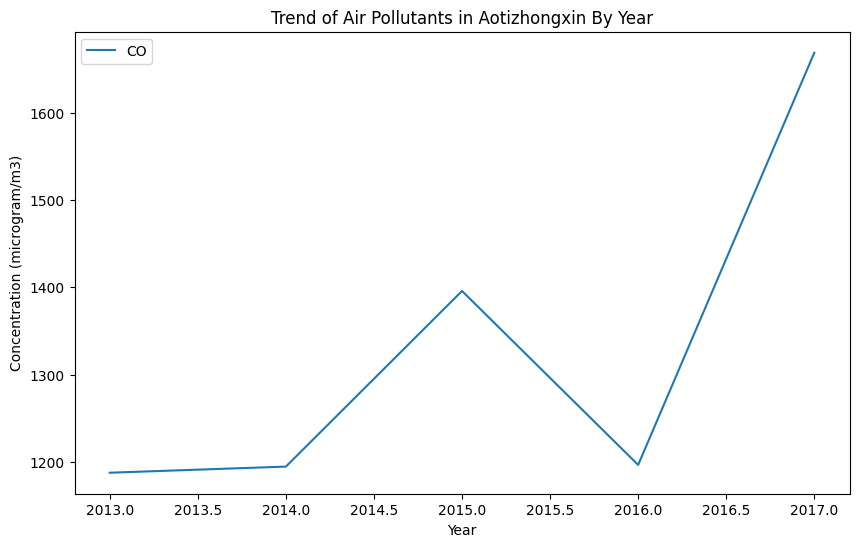

In [15]:
## Because concentration CO is to high we seperate the chart

groupByYear = aotizhongxinDf.groupby("year").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByYear.index, groupByYear["CO"], label="CO")
plt.xlabel("Year")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Aotizhongxin By Year")
plt.legend()
plt.show()

Kualitas udara di Aotizhongxin sedikit membaik terlihat dari polusi PM10, SO2, O3 yang menurun, tetapi ada juga yang belum menurun seperti PM2.5,NO2,CO

### Pertanyaan 2: Bagaimana trend udara di Aotizhongxin berdasarkan bulan?, dan dibulan apakah polusi udara di Aotizhongxin paling sedikit?

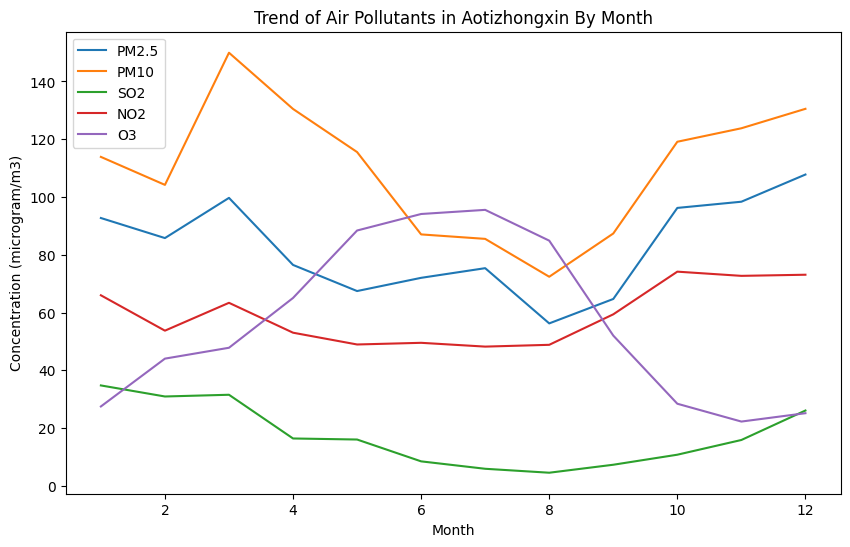

In [16]:
groupByMonth = aotizhongxinDf.groupby("month").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByMonth.index, groupByMonth["PM2.5"], label="PM2.5")
plt.plot(groupByMonth.index, groupByMonth["PM10"], label="PM10")
plt.plot(groupByMonth.index, groupByMonth["SO2"], label="SO2")
plt.plot(groupByMonth.index, groupByMonth["NO2"], label="NO2")
plt.plot(groupByMonth.index, groupByMonth["O3"], label="O3")
plt.xlabel("Month")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Aotizhongxin By Month")
plt.legend()
plt.show()

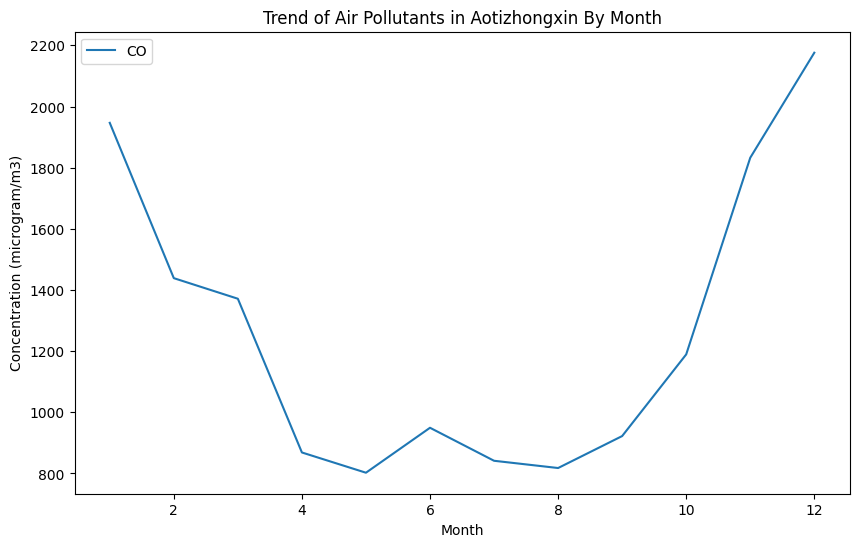

In [17]:
## Because concentration CO is to high we seperate the chart

groupByMonth = aotizhongxinDf.groupby("month").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByMonth.index, groupByMonth["CO"], label="CO")
plt.xlabel("Month")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Aotizhongxin By Month")
plt.legend()
plt.show()

Trend kualitas udara di aotizhongxin menurun di awal tahun dan naik di akhir tahun. di bulan agustus/ bulan ke 8 kualitas udara di aotizhongxin yang paling bagus/ polusi yang paling sedikit

### Pertanyaan 3: Bagaimana trend udara di Aotizhongxin berdasarkan hari?, dan tanggal berapakah polusi udara di Aotizhongxin paling sedikit?

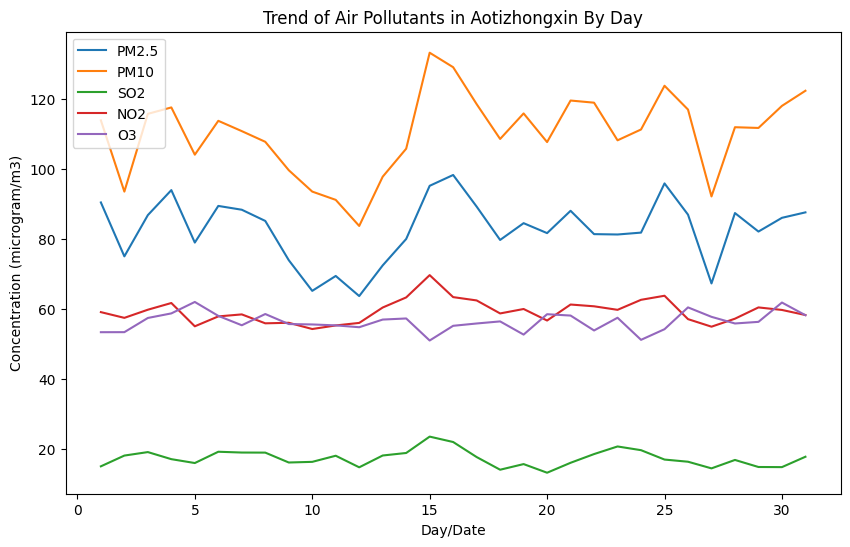

In [18]:
groupByDay = aotizhongxinDf.groupby("day").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByDay.index, groupByDay["PM2.5"], label="PM2.5")
plt.plot(groupByDay.index, groupByDay["PM10"], label="PM10")
plt.plot(groupByDay.index, groupByDay["SO2"], label="SO2")
plt.plot(groupByDay.index, groupByDay["NO2"], label="NO2")
plt.plot(groupByDay.index, groupByDay["O3"], label="O3")
plt.xlabel("Day/Date")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Aotizhongxin By Day")
plt.legend()
plt.show()

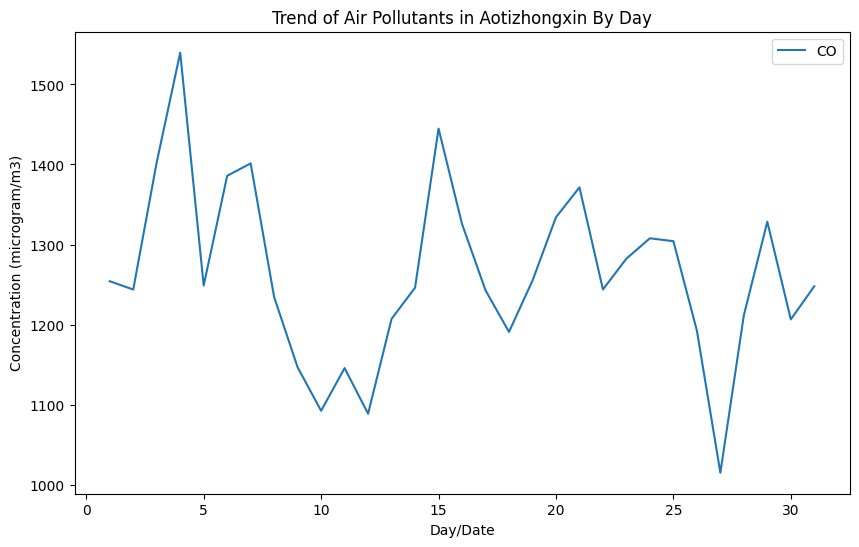

In [19]:
groupByDay = aotizhongxinDf.groupby("day").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByDay.index, groupByDay["CO"], label="CO")
plt.xlabel("Day/Date")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Aotizhongxin By Day")
plt.legend()
plt.show()

Trend Kualitas udara beradasarkan hari/tanggal di Aotizhongxin agak stagnan tidak banyak berubah, namun setiap tanggal 15 ada kenaikan polusi udara. dan Di tanggal 12 kualitas udara di aotizhongxin paling bagus

### Pertanyaan 4: Bagaimana trend udara di Aotizhongxin berdasarkan jam?, dan dijam berapakah polusi udara di Aotizhongxin paling sedikit?

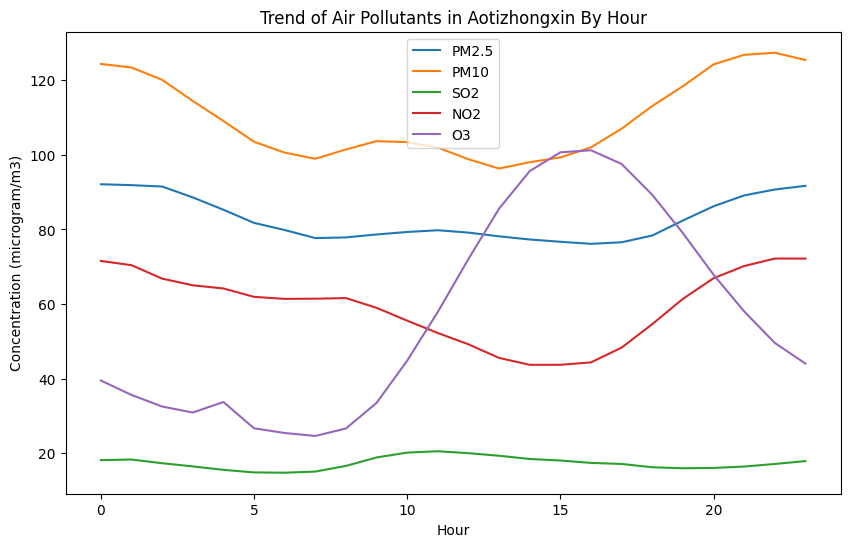

In [20]:
groupByHour = aotizhongxinDf.groupby("hour").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByHour.index, groupByHour["PM2.5"], label="PM2.5")
plt.plot(groupByHour.index, groupByHour["PM10"], label="PM10")
plt.plot(groupByHour.index, groupByHour["SO2"], label="SO2")
plt.plot(groupByHour.index, groupByHour["NO2"], label="NO2")
plt.plot(groupByHour.index, groupByHour["O3"], label="O3")
plt.xlabel("Hour")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Aotizhongxin By Hour")
plt.legend()
plt.show()

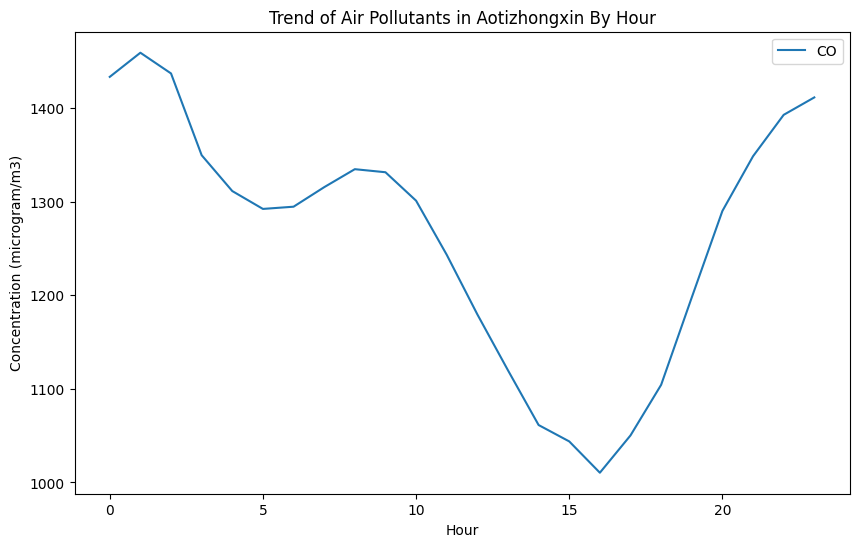

In [21]:
groupByHour = aotizhongxinDf.groupby("hour").mean(numeric_only=True)


plt.figure(figsize=(10,6))
plt.plot(groupByHour.index, groupByHour["CO"], label="CO")
plt.xlabel("Hour")
plt.ylabel("Concentration (microgram/m3)")
plt.title("Trend of Air Pollutants in Aotizhongxin By Hour")
plt.legend()
plt.show()

Trend Kualitas udara di aotizhongxin menurun dari jam 12 malam sampai jam 5 pagi, namun setelah jam 18 rata2 polusi udara naik. dan di jam 16 kualitas udara di aotizhongzin yg paling baik, karena rata2 dari polusi menurun di jam 16

### Pertanyaan 5: Apakah ada korelasi polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan seperti suhu, tekanan, titik embun, hujan, arah angin, dan kecepatan angin? 

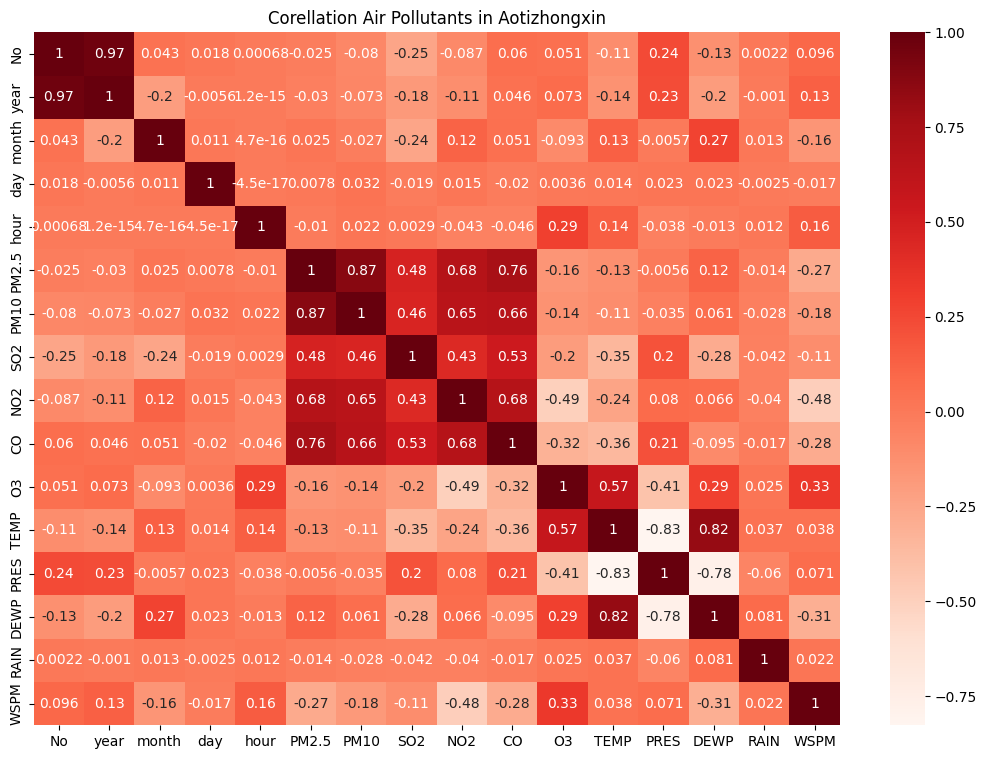

In [22]:
plt.figure(figsize=(13,9))

sns.heatmap(aotizhongxinDf.corr(numeric_only = True),cmap=plt.cm.Reds,annot=True)
plt.title("Corellation Air Pollutants in Aotizhongxin")
plt.show()

Ada korelasi antara polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan variabel meteorologi seperti suhu, tekanan, titik embun, hujan, arah angin, dan kecepatan angin.
Korelasi ini dapat bersifat positif atau negatif, artinya konsentrasi polutan udara dapat meningkat atau menurun seiring dengan perubahan variabel meteorologi.

## Conclusion

- Bagaimana kualitas udara di Aotizhongxin dari tahun ke tahun? apakah ada perbaikan?
> Kualitas udara di Aotizhongxin sedikit membaik terlihat dari polusi PM10, SO2, O3 yang menurun, tetapi ada juga yang belum menurun seperti PM2.5,NO2,CO
- Bagaimana trend udara di Aotizhongxin berdasarkan bulan?, dan dibulan apakah polusi udara di Aotizhongxin paling sedikit?
> Trend kualitas udara di aotizhongxin menurun di awal tahun dan naik di akhir tahun. di bulan agustus/ bulan ke 8 kualitas udara di aotizhongxin yang paling bagus/ polusi yang paling sedikit
- Bagaimana trend udara di Aotizhongxin berdasarkan hari?, dan tanggal berapakah polusi udara di Aotizhongxin paling sedikit?
> Trend Kualitas udara beradasarkan hari/tanggal di Aotizhongxin agak stagnan tidak banyak berubah, namun setiap tanggal 15 ada kenaikan polusi udara. dan Di tanggal 12 kualitas udara di aotizhongxin paling bagus
- Bagaimana trend udara di Aotizhongxin berdasarkan jam?, dan dijam berapakah polusi udara di Aotizhongxin paling sedikit?
> Trend Kualitas udara di aotizhongxin menurun dari jam 12 malam sampai jam 5 pagi, namun setelah jam 18 rata2 polusi udara naik. dan di jam 16 kualitas udara di aotizhongzin yg paling baik, karena rata2 dari polusi menurun di jam 16
- Apakah ada korelasi polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan seperti suhu, tekanan, titik embun, hujan, arah angin, dan kecepatan angin?
> Ada korelasi antara polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan variabel meteorologi seperti suhu, tekanan, titik embun, hujan, arah angin, dan kecepatan angin.
> Korelasi ini dapat bersifat positif atau negatif, artinya konsentrasi polutan udara dapat meningkat atau menurun seiring dengan perubahan variabel meteorologi.